In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('C:/Users/DELL/Downloads/Project/financial_risk_assessment.csv')

# Display the first few rows of the dataset
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [6]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [7]:
# Summary statistics for numerical columns
df.describe(include=[np.number])


,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [8]:

# Summary statistics for categorical columns
df.describe(include=[object])


,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,City,State,Country,Risk Rating
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,3,4,4,4,3,4,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,19,282,124,9000


In [9]:

# Check for missing values
df.isnull().sum()


Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

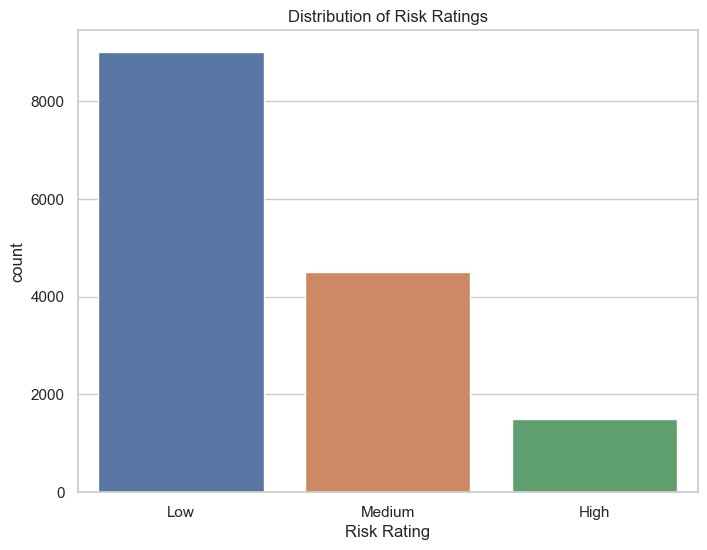

In [10]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Ratings')
plt.show()

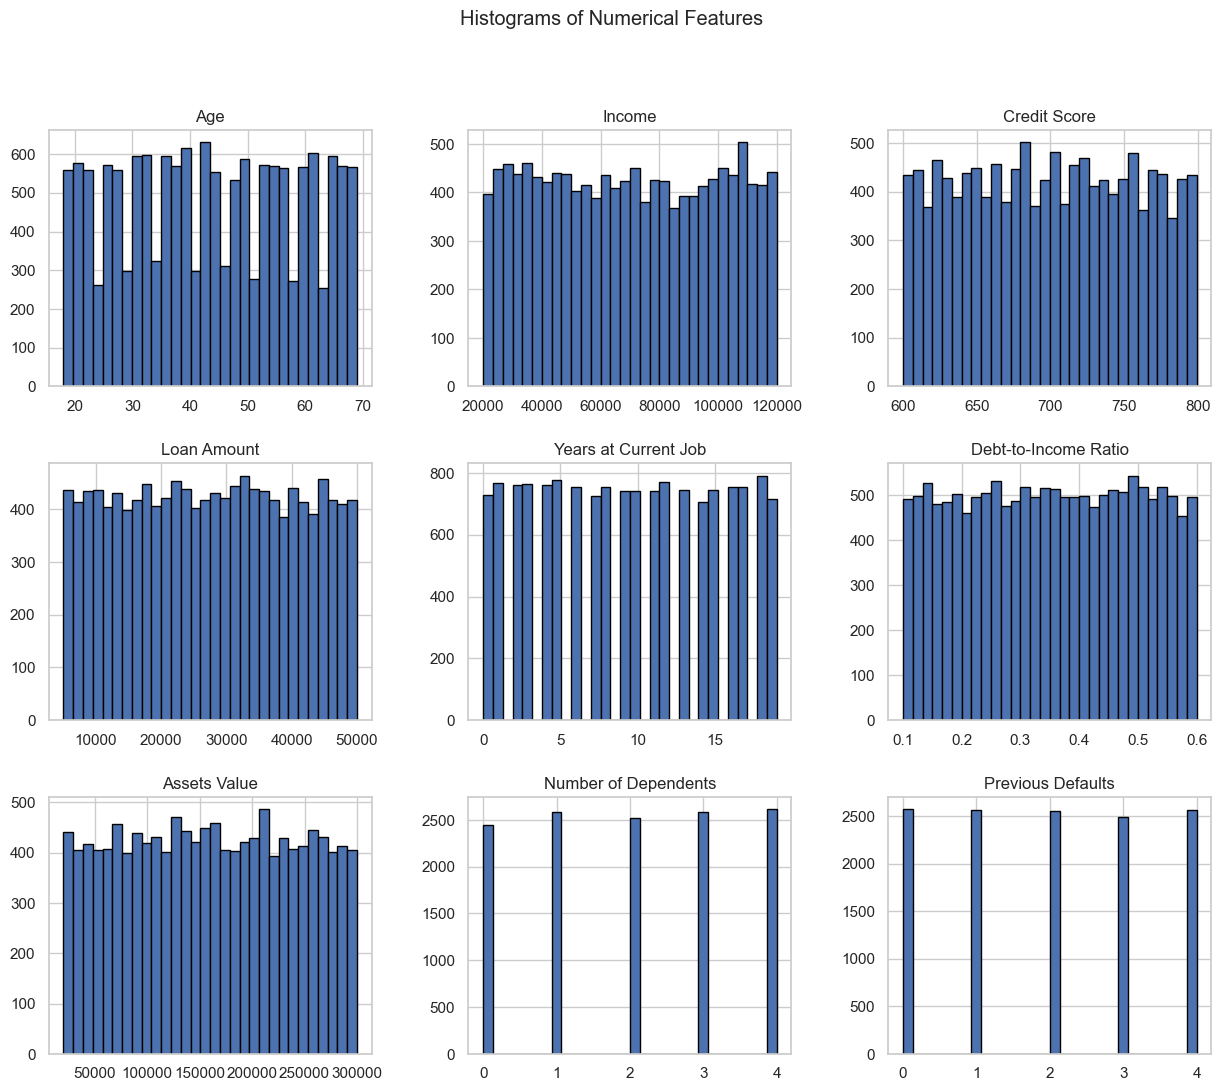

In [11]:
# Histograms for numerical features
num_features = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 
                 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults']
df[num_features].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

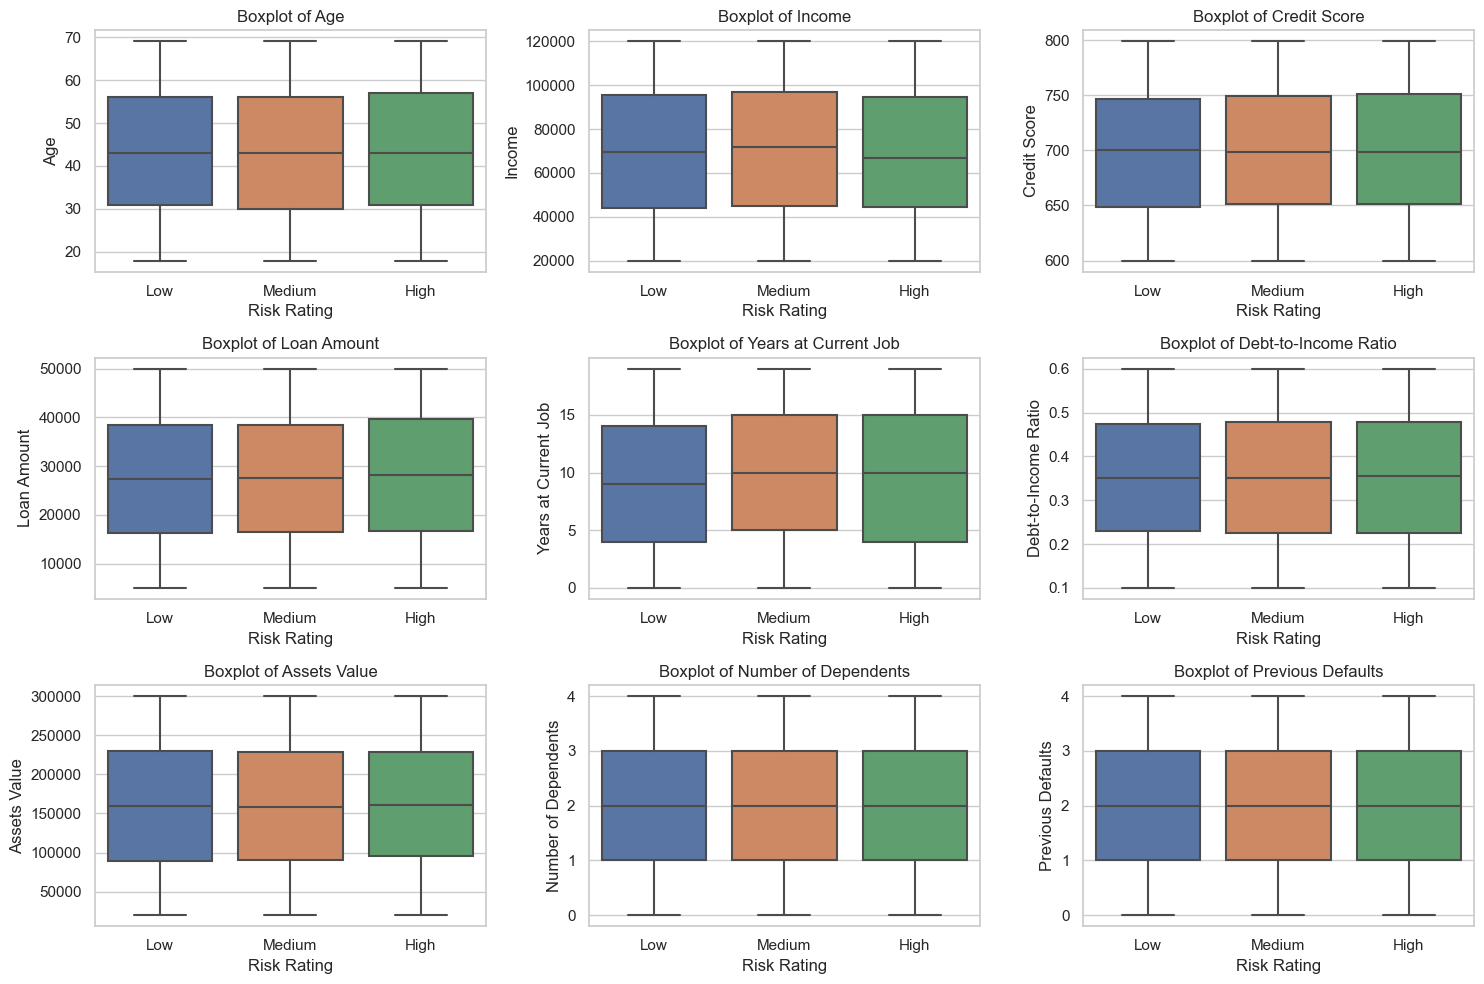

In [12]:
# Box plots for numerical features by Risk Rating
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Risk Rating', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

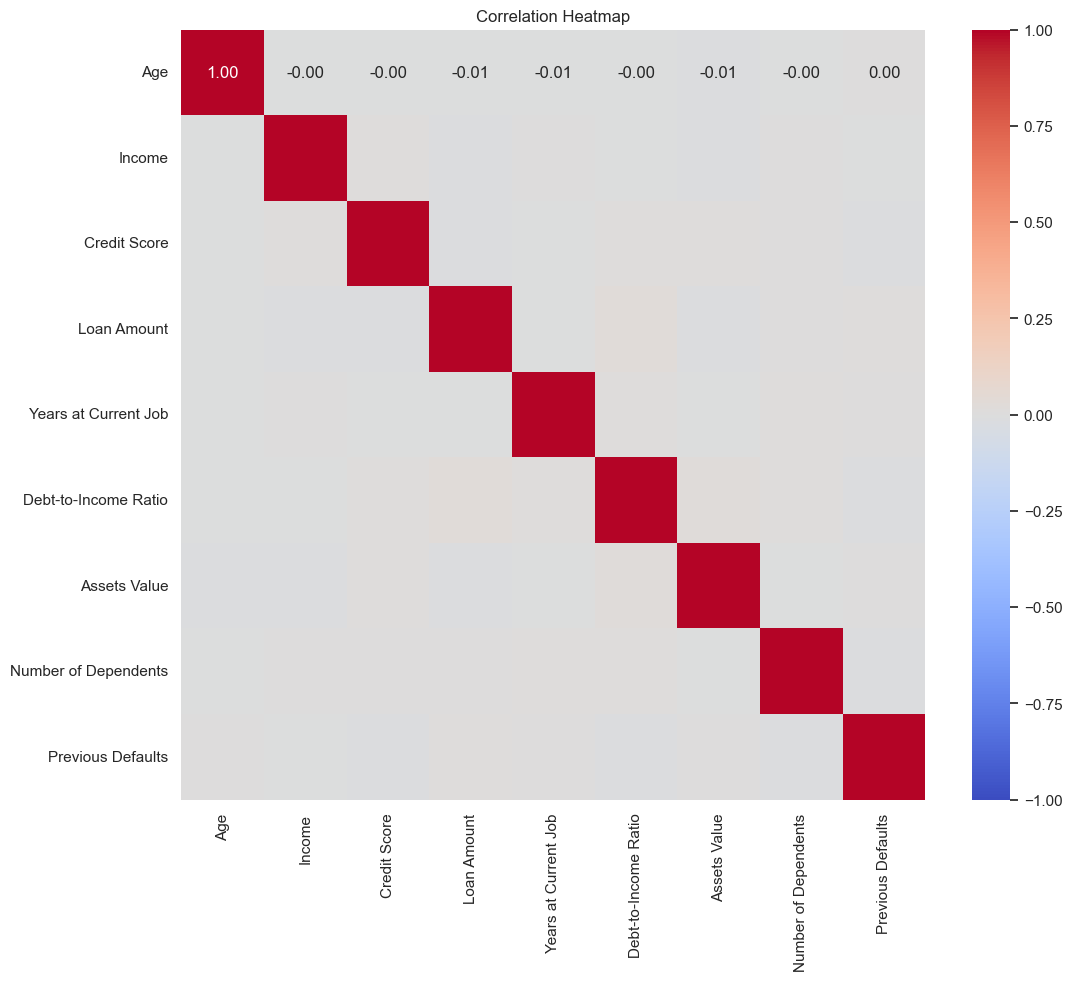

In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Count of unique values in categorical columns
for column in ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 
                'Payment History', 'City', 'State', 'Country']:
    print(f'{column} unique values:')
    print(df[column].value_counts())
    print()

Gender unique values:
Gender
Non-binary    5059
Female        4990
Male          4951
Name: count, dtype: int64

Education Level unique values:
Education Level
Bachelor's     3829
High School    3774
PhD            3760
Master's       3637
Name: count, dtype: int64

Marital Status unique values:
Marital Status
Widowed     3893
Divorced    3787
Single      3697
Married     3623
Name: count, dtype: int64

Loan Purpose unique values:
Loan Purpose
Personal    3771
Home        3766
Business    3738
Auto        3725
Name: count, dtype: int64

Employment Status unique values:
Employment Status
Employed         5026
Self-employed    4991
Unemployed       4983
Name: count, dtype: int64

Payment History unique values:
Payment History
Good         3822
Excellent    3789
Poor         3716
Fair         3673
Name: count, dtype: int64

City unique values:
City
East Michael       19
Lake Michael       16
Port Michael       16
West Michael       13
West David         13
                   ..
Annehaven 

In [15]:
# Define features and target
X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

# Handle missing values and encode categorical variables
numeric_features = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 
                     'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change']
categorical_features = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 
                         'Payment History', 'City', 'State', 'Country']

In [16]:
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Credit Score',
                                                   'Loan Amount',
                                                   'Years at Current Job',
                                                   'Debt-to-Income Ratio',
                                                   'Assets Value',
                                                   'Number of Dependents',
                                                   'Previous Defaults',
                                                   'Marital Status Change']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Marital Status',
                                                   'Loan Purpose',
                                                   'Employment Status',
                                                   'Payment History', 'City',
                                                   'State', 'Country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       326
         Low       0.59      1.00      0.74      1779
      Medium       0.40      0.00      0.00       895

    accuracy                           0.59      3000
   macro avg       0.33      0.33      0.25      3000
weighted avg       0.47      0.59      0.44      3000



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


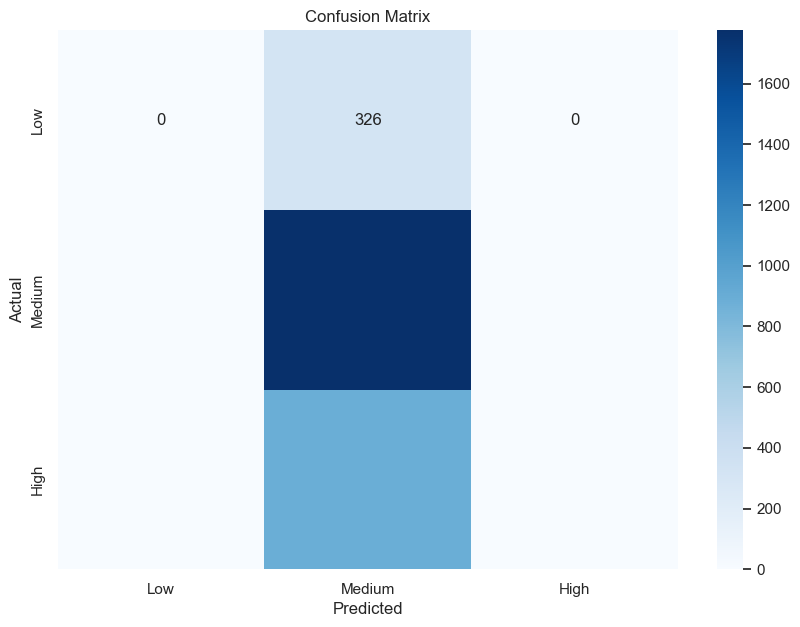

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()